In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import FormatStrFormatter
from mainscript import OnesidedCoupling

# Timeseries

Duffing

In [128]:
t_step = 0.0001
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 1000, t_step)
keep = int(t_last / t_step)
x = 1
y = 1
p = 1
q = 1
par = x,y,p,q



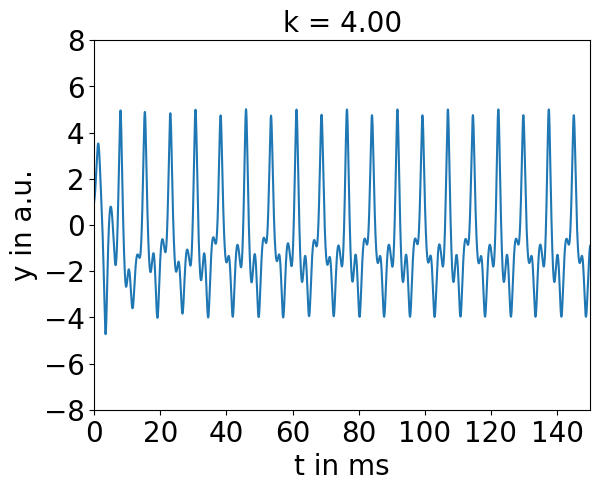

In [166]:
k = 4
gamma = 0.1
mu = 2.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

xsol = lilie.x_solv()
ysol = lilie.y_solv()
psol = lilie.p_solv()
qsol = lilie.q_solv()

plt.plot(t, ysol, label = f"k: {k:.2f}")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
# plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.title("k = " + f"{k:.2f}", fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([-8, 8])
plt.xlim([0,150])
# plt.savefig(path + "y_timeseries_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

# Van der Pol

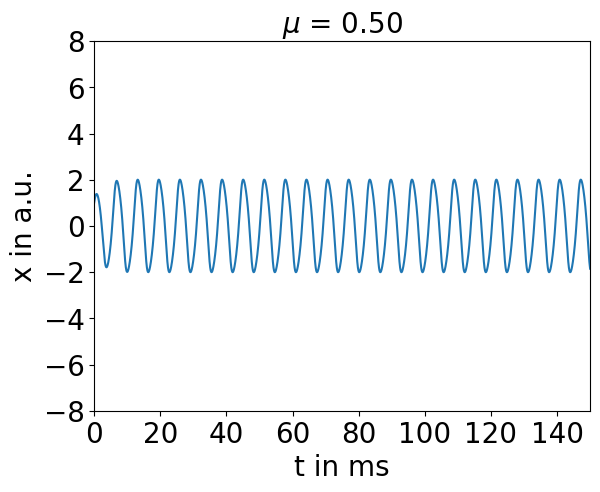

In [152]:
k = 0.1
gamma = 0.1
mu = 0.5 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

xsol = lilie.x_solv()
ysol = lilie.y_solv()
psol = lilie.p_solv()
qsol = lilie.q_solv()

plt.plot(t, xsol, label = f"k: {k:.2f}")
plt.ylabel("x in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
# plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.title("$\\mu$ = " + f"{mu:.2f}", fontsize = 20)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim([-8, 8])
plt.xlim([0,150])
# plt.savefig(path + "y_timeseries_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

In [55]:
def compute_amplitude(par, t, keep, k, mu, gamma, alpha, beta):
    amp = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta).peak()[1][1]['peak_heights'][-10:]

    return amp
import math
def approx(listofnum, tol):
     mean = np.mean(listofnum)
     boolean = [abs(i - mean) / mean * 100 for i in listofnum]
     
     for num in boolean:
          if num > tol:
               return math.nan
          else:
               return mean

In [56]:
np.mean(compute_amplitude((1,1.4,1.4,1), t, keep, k, mu, gamma, alpha, beta))

np.float64(4.088103803037371)

# Phase plane

Duffing

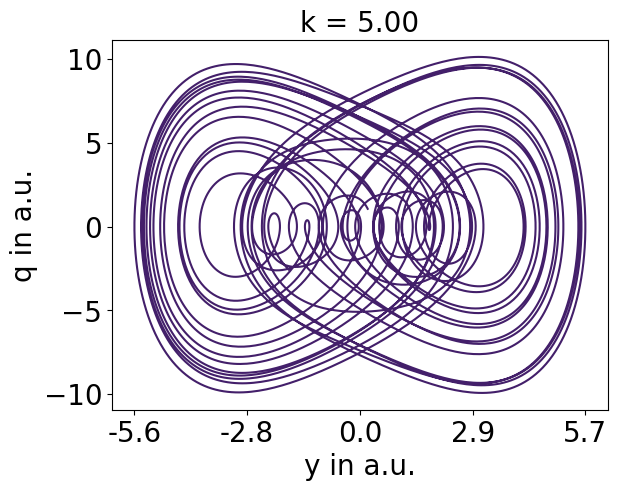

In [127]:
# phaseplane for one k value


t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)

k = 5
gamma = 0.1
mu = 2.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2


par = 1,1,1,1
limit = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)
y_sol = limit.y_solv()[-keep:]
q_sol = limit.q_solv()[-keep:]
plt.plot(y_sol,q_sol, color = "#431F6A")  

 
plt.xlabel("y in a.u.",fontsize = 20)
plt.ylabel("q in a.u.",fontsize = 20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(np.linspace(min(y_sol),max(y_sol), 5), fontsize = 20)

plt.tick_params(labelsize=20)
plt.title("k = " + f"{k:.2f}", fontsize = 20)

plt.yticks(fontsize = 20)
plt.show()

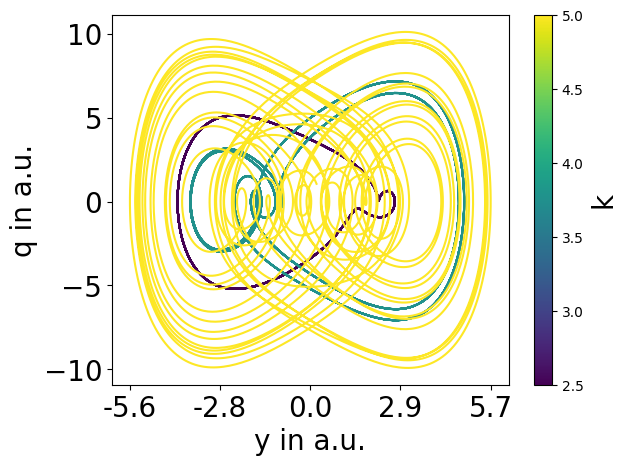

In [4]:
# phaseplane for mltiple k values

with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)

k = np.linspace(2.5 ,5, 3)
gamma = 0.1
mu = 2.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2

cmap = plt.get_cmap('viridis', len(k))
fig, ax = plt.subplots()
for i in range(len(k)):
  par = 1,1,1,1
  limit = OnesidedCoupling(par, t, keep, k[i], mu, gamma, alpha, beta)
  y_sol = limit.y_solv()[-keep:]
  q_sol = limit.q_solv()[-keep:]
  ax.plot(y_sol,q_sol, color = cmap(i))  

 
plt.xlabel("y in a.u.",fontsize = 20)
plt.ylabel("q in a.u.",fontsize = 20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(np.linspace(min(y_sol),max(y_sol), 5), fontsize = 20)

normalize = mcolors.Normalize(vmin=min(k), vmax=max(k))

norm = Normalize(vmin = min(k), vmax = max(k))
sm = ScalarMappable(cmap = "viridis", norm = norm)
sm.set_array([])
plt.colorbar(sm, ax = ax).ax.set_ylabel('k', fontsize = 20)
plt.tick_params(labelsize=20)

plt.yticks(fontsize = 20)
plt.savefig(path +"y_phaseplane_multiplek_alpha02_ß05_smallhysteresis" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

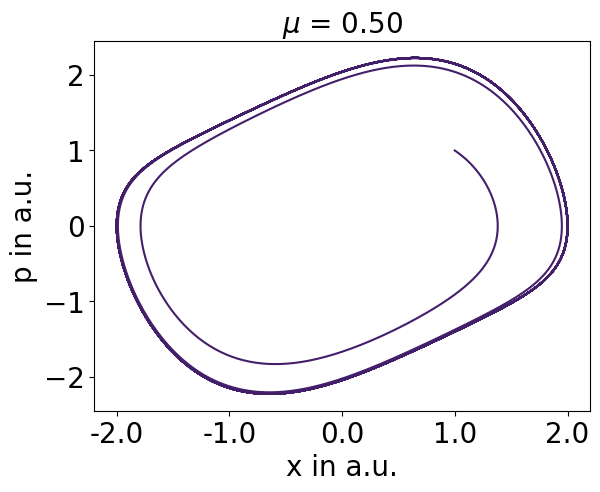

In [165]:
# Van der Pol Phase plane


t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)

k = 1
gamma = 0.1
mu = 0.5 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2


par = 1,1,1,1
limit = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)
y_sol = limit.x_solv()[:keep]
q_sol = limit.p_solv()[:keep]
plt.plot(y_sol,q_sol, color = "#431F6A")  

 
plt.xlabel("x in a.u.",fontsize = 20)
plt.ylabel("p in a.u.",fontsize = 20)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(np.linspace(min(y_sol),max(y_sol), 5), fontsize = 20)
plt.title("$\\mu$ = " + f"{mu:.2f}", fontsize = 20)
plt.tick_params(labelsize=20)
plt.yticks(fontsize = 20)
plt.show()

In [71]:
k_up = np.arange(0.01,1, 0.01)
alpha = np.arange(0.01, 3, 0.1)
[6, 6], [8, 133], [9, 135], [10, 137], [11, 139], [12, 142]

([6, 6], [8, 133], [9, 135], [10, 137], [11, 139], [12, 142])

In [73]:
k_up = np.arange(0.01,2.5, 0.01)[133]
alpha = np.arange(0.01, 3, 0.1)[8]
print(k, alpha)

0.61 0.81


[117 924] {'peak_heights': array([1.68230872, 1.85188057])}


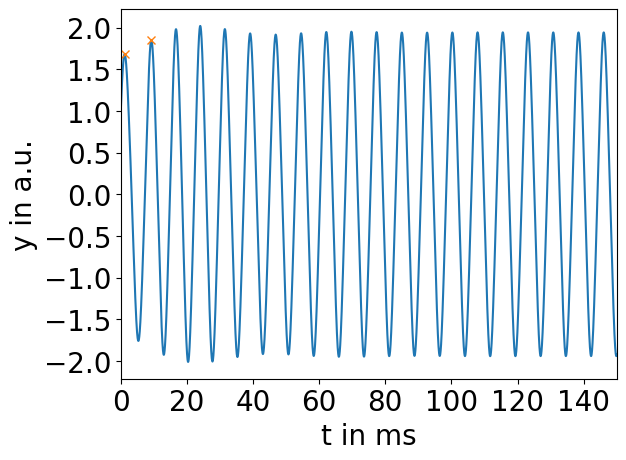

In [98]:
from scipy.signal import find_peaks
t_step = 0.01
t_last = 100 # 50h -> 1 point represent 1h
t = np.arange(0, 200, t_step)
keep = int(t_last / t_step)
x = 1
y = 1
p = 1
q = 1
par = x,y,p,q
k = 0.1
gamma = 0.1
mu = 2.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.2
alpha = 0.2
lilie = OnesidedCoupling(par, t, keep, k, mu, gamma, alpha, beta)

xsol = lilie.x_solv()
ysol = lilie.y_solv()
psol = lilie.p_solv()
qsol = lilie.q_solv()

peak,prop = find_peaks(ysol[0:1000], height = (np.repeat(-max(ysol[0:1000]), len(ysol[0:1000])),np.repeat(max(ysol[0:1000]), len(ysol[0:1000]))))
print(peak, prop)
plt.plot(t, ysol, label = f"k: {k:.2f}")
plt.plot(t[peak], prop['peak_heights'], "x")
plt.ylabel("y in a.u.", fontsize = 20)
y_title = "$\gamma$ = " + f"{gamma:.2f}, ß = " + f"{beta:.2f}, $\\alpha$ = " + f"{alpha:.2f}, $\mu$ = " + f"{mu:.2f}, x$_0$ = " + f"{par[0]:.2f}, y$_0$ = "+ f"{par[1]:.2f}, p$_0$ = "+ f"{par[2]:.2f}, q$_0$ = "+ f"{par[3]:.2f}"
# plt.legend(fontsize = 16, loc = "upper left")
plt.xlabel("t in ms", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.ylim([-8, 8])
plt.xlim([0,150])
# plt.savefig(path + "y_timeseries_alpha05" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()

# K change

In [103]:
t_step = 0.01
t_last = 250 # 50h -> 1 point represent 1h
t = np.arange(0, 300, t_step)
keep = int(t_last / t_step)
k = [0.1, 2.5, 3.0, 4.0, 5.0]

new_t = [t[z * int(t.shape[0]/len(k)): (z +1) *int(t.shape[0]/len(k))] for z in range(len(k))]


gamma = 0.1
mu = 2.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2

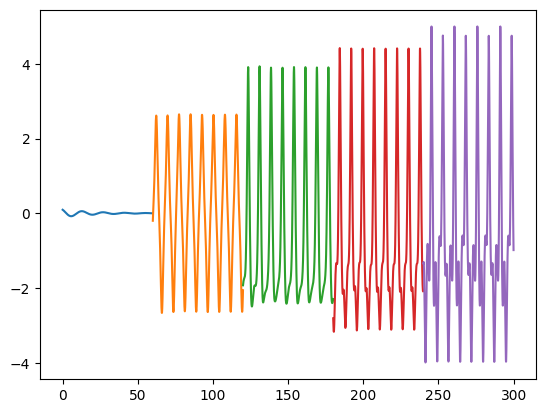

In [104]:
amplitudes_up = []

x = 1
y = 1
p = 1
q = 1
par0 = x,y,p,q


for i in range(len(k)):
    
    sol = OnesidedCoupling(par0, new_t[i], keep, i, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes = OnesidedCoupling(par0, new_t[i], keep, i, mu, gamma, alpha, beta).y_solv()
    plt.plot(new_t[i], amplitudes)

plt.show()

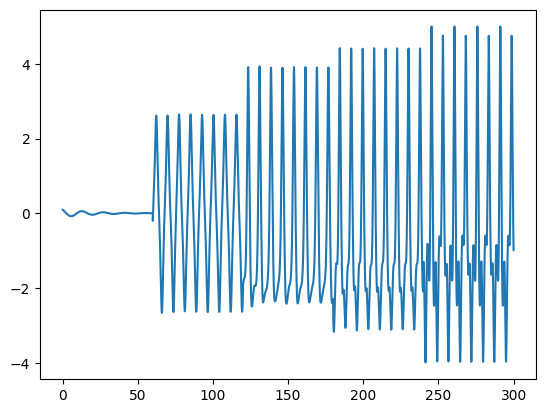

In [105]:
amplitudes_up = []

x = 1
y = 1
p = 1
q = 1
par0 = x,y,p,q


for i in range(len(k)):
    
    sol = OnesidedCoupling(par0, new_t[i], keep, i, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    amplitudes_up.append(OnesidedCoupling(par0, new_t[i], keep, i, mu, gamma, alpha, beta).y_solv())
plt.plot(t, np.concatenate(np.array(amplitudes_up)))

plt.show()


# coexisting chaos?

In [31]:
t_step = 0.01
t_last = 4500 # 50h -> 1 point represent 1h
t = np.arange(0, 5000, t_step)
keep = int(t_last / t_step)
x = 1
y = 1
p = 1
q = 1
par0 = x,y,p,q
k_up = np.arange(0, 10, 0.01)
k_down = k_up[::-1]
gamma = 0.1
mu = 10.0 # realistic mu value, because the vocal foldds doesnt oscillate sinousidal 
beta = 0.3
alpha = 0.2


In [32]:
mean_chaos_up = []
mean_chaos_down = []

for f in k_up:
    sol = OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    mean_chaos_up.append(np.mean(OnesidedCoupling(par0, t, keep, f, mu, gamma, alpha, beta).y_solv()[150:]))

par0 = sol[-1]

for j in k_down:
    sol = OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).duffvdpsolver()
    par0 = sol[-1]
    mean_chaos_down.append(np.mean(OnesidedCoupling(par0, t, keep, j, mu, gamma, alpha, beta).y_solv()[150:]))



In [45]:
with open(str(Path.cwd().parents[0]) + "/path.txt") as f:
  path = f.read()

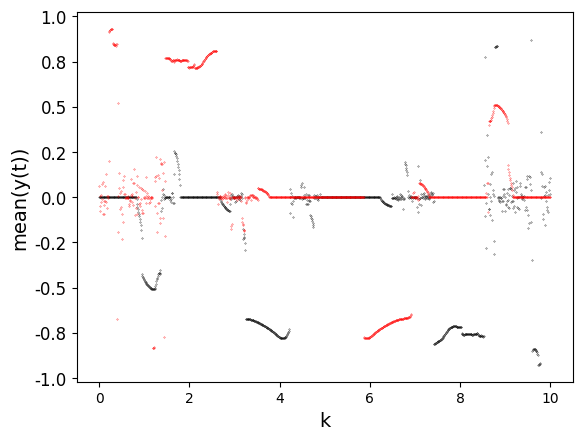

In [47]:
plt.plot(k_up, mean_chaos_up, "k.", markersize = 0.5)
plt.plot(k_up, mean_chaos_down, "r.", markersize = 0.5)
plt.xlabel("k", fontsize = 14)
plt.ylabel("mean(y(t))", fontsize = 14)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.yticks(fontsize = 12)
plt.savefig(path +"longtimeaverage" + ".png", dpi =  300, bbox_inches = "tight")
plt.show()